## Exploratory Data Analysis (EDA) Summary
#Sanity Check:
>No Missing Values: The dataset contains no missing values.

>Dataset Dimensions: The dataset consists of 8 columns and 4340 rows.

>Duplicates: 763 duplicate values were found and removed.

>Effective Rows: After removing duplicates, 3577 effective rows remain.

#Categorical Histograms:
>Histograms were generated to show the frequency data for various categorical fields, providing insights into the distribution of these categories.

#Pairplots:
>Pairplots were created to visualize the relationships between different pairs of features, helping to identify potential correlations and patterns.
#BoxPlots:
>The box plot for Feature 2 is instrumental in identifying outliers. Major Outlier were observed



#One-Hot Encoding:
>One-hot encoding was applied to categorical variables to convert them into numerical format, allowing for better compatibility with machine learning models.

>age field was added to replace year field calculated as (2019-df["year"])

#Correlation Analysis:
>Main Objective: Selling Price

Correlation: The selling price was identified as our main objective. However, it was found to have weak correlations with other data fields, indicating that none of the fields are strongly related to the selling price. Only fields showing little promise were age,transmissiona and fuel.

#Linear Regression:
>As per the briefing a linear regression model was applied to predict the selling price. The model performance was average, even after applying scaling. It is suggested to use other models like Random Forest for better accuracy.

#Insteresting Graphs:
> Created Some data based graphs for more clear visualization

> affect of other data on selling price

# Data and lib Import

In [215]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder , StandardScaler
pd.options.mode.chained_assignment = None



In [216]:
raw_df = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
raw_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


# Sanity Check

In [217]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [218]:
raw_df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [219]:
raw_df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [220]:
raw_df.duplicated().sum()

763

In [221]:
df = raw_df.drop_duplicates()
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [222]:
df.duplicated().sum()

0

# Basic Categorical Histograms

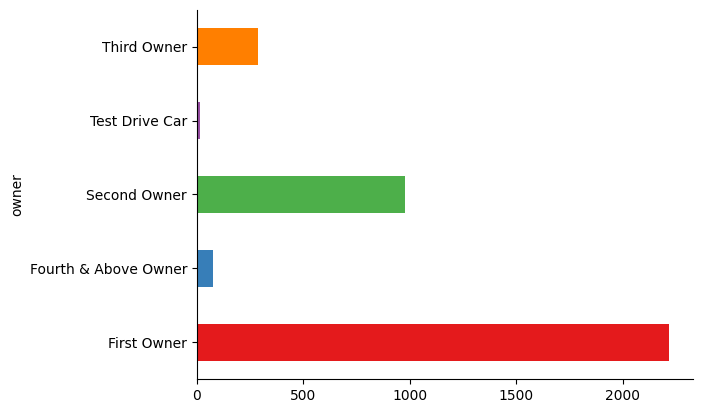

In [223]:
df.groupby('owner').size().plot(kind='barh', color=sns.palettes.mpl_palette('Set1'))
plt.gca().spines[['top', 'right',]].set_visible(False)

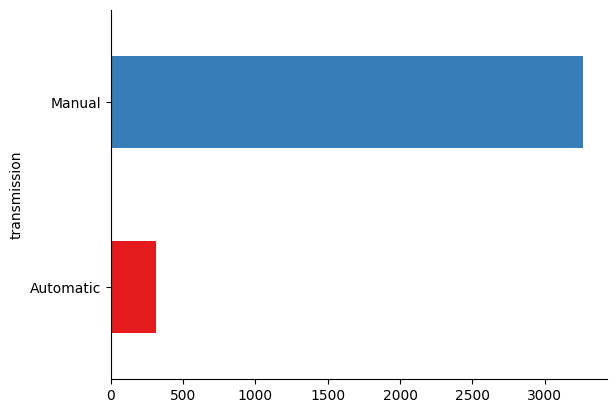

In [224]:
df.groupby('transmission').size().plot(kind='barh', color=sns.palettes.mpl_palette('Set1'))
plt.gca().spines[['top', 'right',]].set_visible(False)

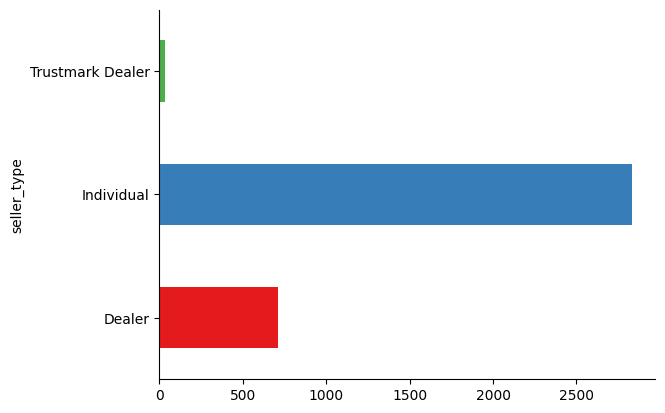

In [225]:
df.groupby('seller_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Set1'))
plt.gca().spines[['top', 'right',]].set_visible(False)

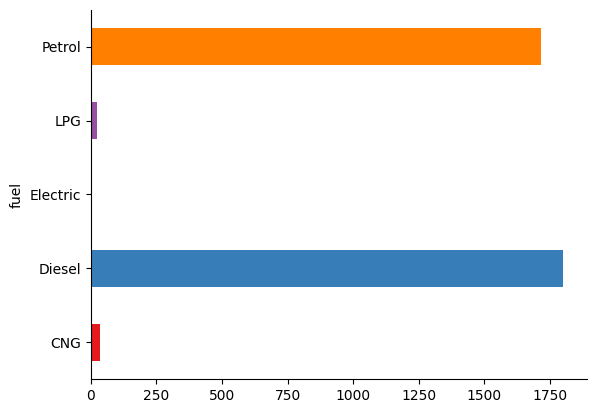

In [226]:
df.groupby('fuel').size().plot(kind='barh', color=sns.palettes.mpl_palette('Set1'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# PairPlots

Text(0.5, 1.05, 'BY TRANSMISSION')

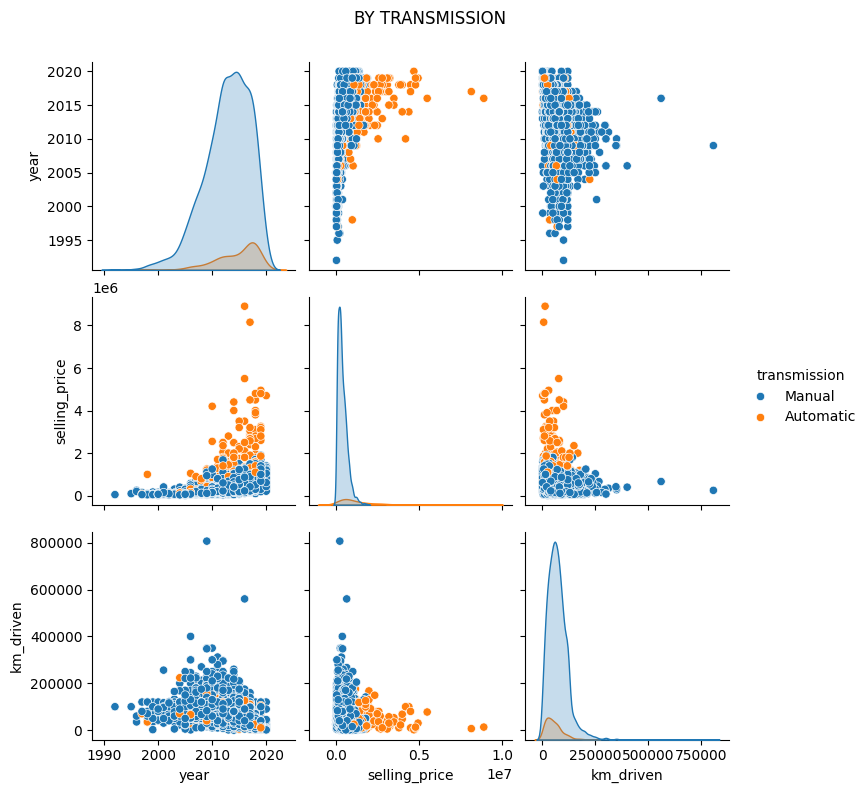

In [227]:
sns.color_palette("tab10")
sns.pairplot(df,diag_kind="kde",hue='transmission').figure.suptitle('BY TRANSMISSION',y=1.05)


Text(0.5, 1.05, 'BY FUELS')

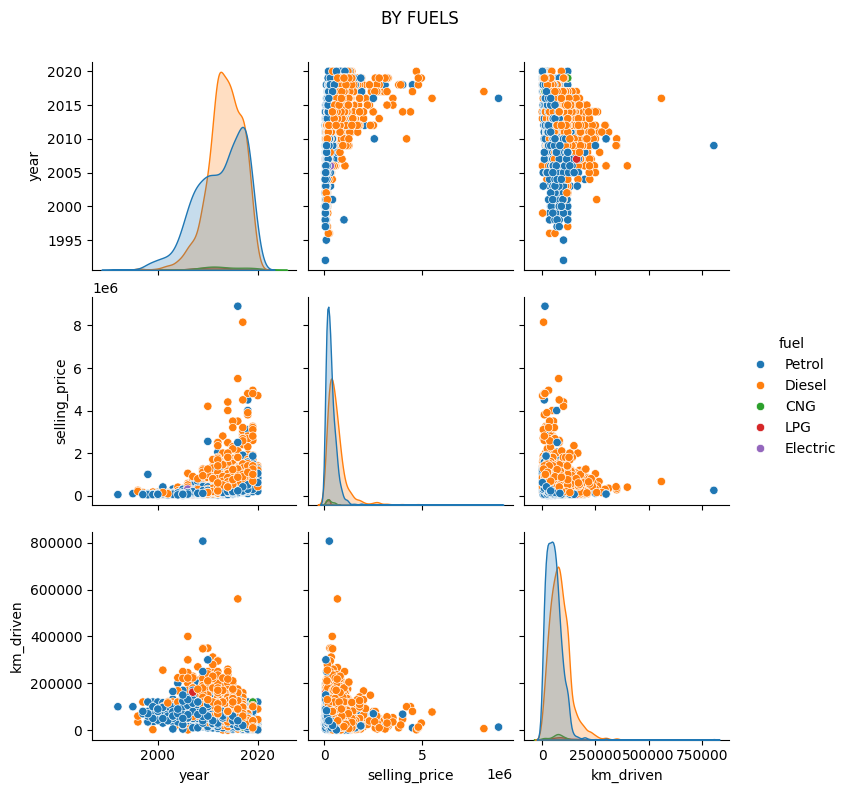

In [228]:
sns.color_palette("tab10")
sns.pairplot(df,diag_kind="kde",hue='fuel',).figure.suptitle('BY FUELS',y=1.05)

Text(0.5, 1.05, 'BY OWNERSHIP')

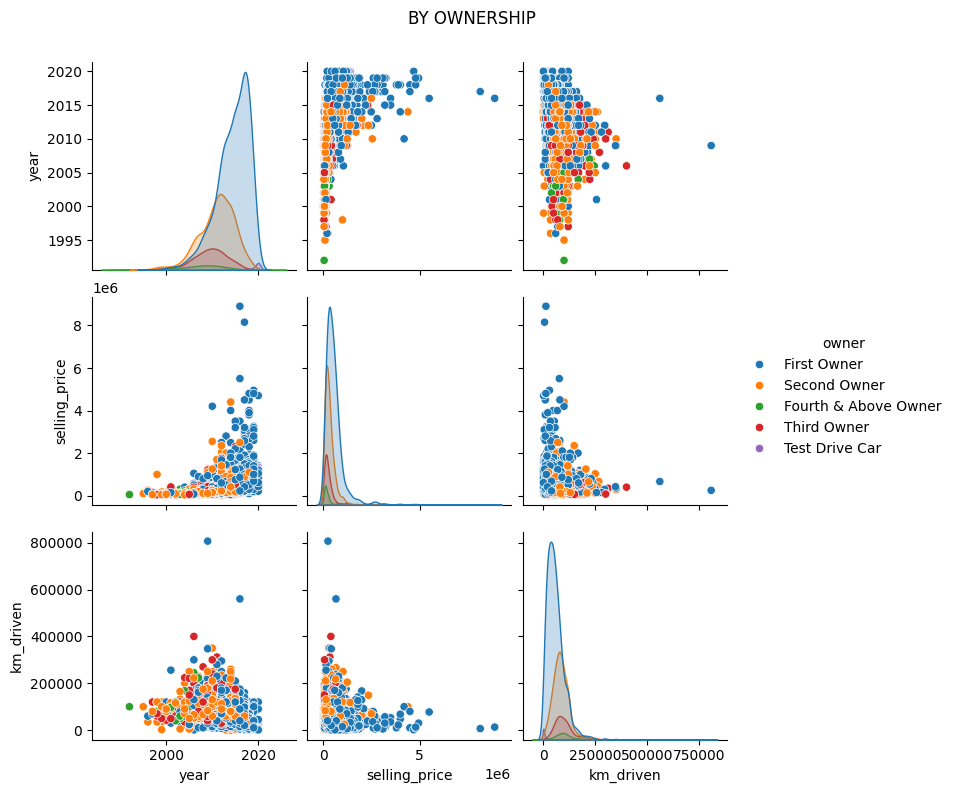

In [229]:
sns.color_palette("tab10")
sns.pairplot(df,diag_kind="kde",hue='owner',).figure.suptitle('BY OWNERSHIP',y=1.05)

# BoxPlots

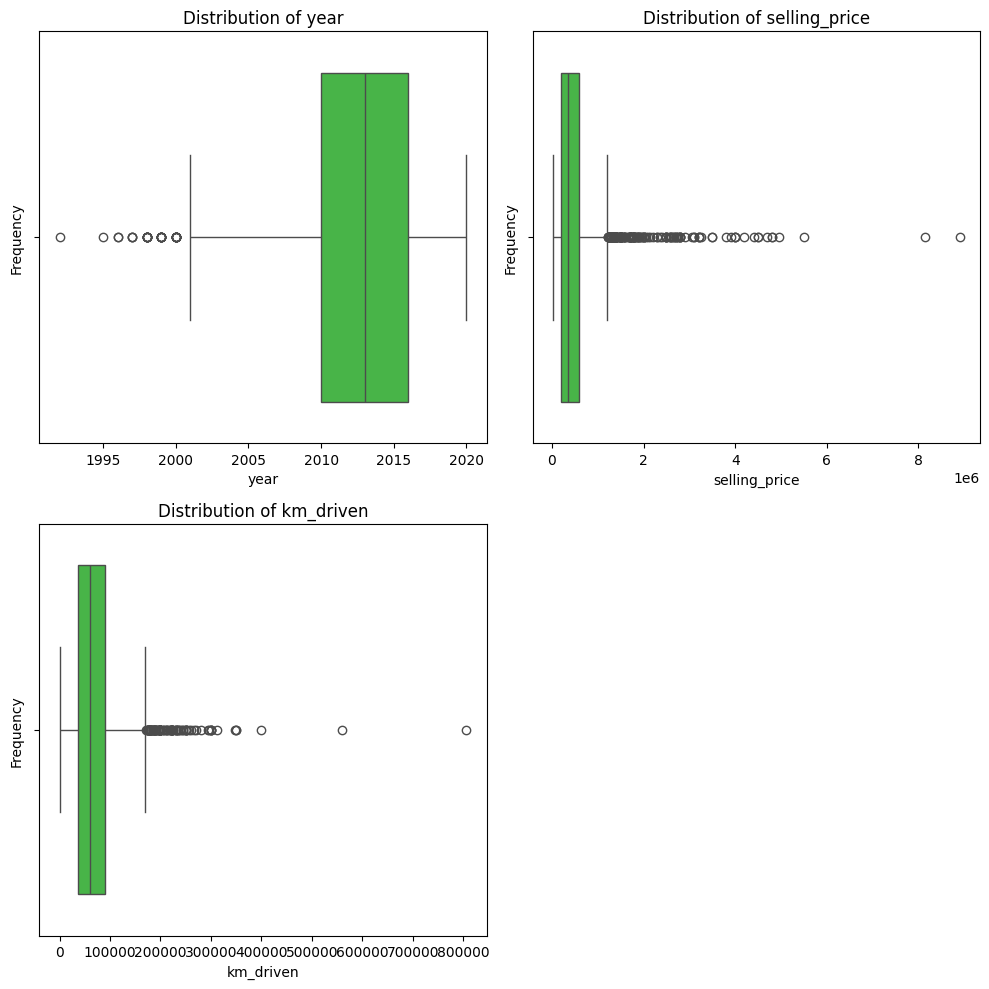

In [230]:
numeric_columns = list(df.select_dtypes(include="number").columns)
n_cols = 2
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

plt.figure(figsize=(10, 10))

for idx, col in enumerate(numeric_columns, start=1):
    plt.subplot(n_rows, n_cols, idx)
    sns.boxplot(data=df, x=col, color="#36c636")
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Corelation Ananlysis

Encoding Data


In [231]:
column_to_encode = ['name','fuel','seller_type','transmission','owner']
le = LabelEncoder()
for column in column_to_encode:
    df[column] = le.fit_transform(df[column])
df["age"]=2020-df["year"]
df.drop('year',axis=1,inplace=True)
df

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,age
0,775,60000,70000,4,1,1,0,13
1,1041,135000,50000,4,1,1,0,13
2,505,600000,100000,1,1,1,0,8
3,118,250000,46000,4,1,1,0,3
4,279,450000,141000,1,1,1,2,6
...,...,...,...,...,...,...,...,...
4335,602,409999,80000,1,1,1,2,6
4336,601,409999,80000,1,1,1,2,6
4337,777,110000,83000,4,1,1,2,11
4338,381,865000,90000,1,1,1,0,4


In [232]:
df.corr()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,age
name,1.000000,-0.067094,0.134967,-0.080758,0.122706,0.073728,0.019102,0.048934
selling_price,-0.067094,1.000000,-0.187359,-0.261979,-0.153182,-0.486269,-0.213130,-0.424260
km_driven,0.134967,-0.187359,1.000000,-0.297611,0.115357,0.101387,0.290991,0.417490
fuel,-0.080758,-0.261979,-0.297611,1.000000,0.031395,0.017071,-0.012783,0.114040
seller_type,0.122706,-0.153182,0.115357,0.031395,1.000000,0.125991,0.176003,0.119385
transmission,0.073728,-0.486269,0.101387,0.017071,0.125991,1.000000,0.060078,0.116692
owner,0.019102,-0.213130,0.290991,-0.012783,0.176003,0.060078,1.000000,0.415832
age,0.048934,-0.424260,0.417490,0.114040,0.119385,0.116692,0.415832,1.000000


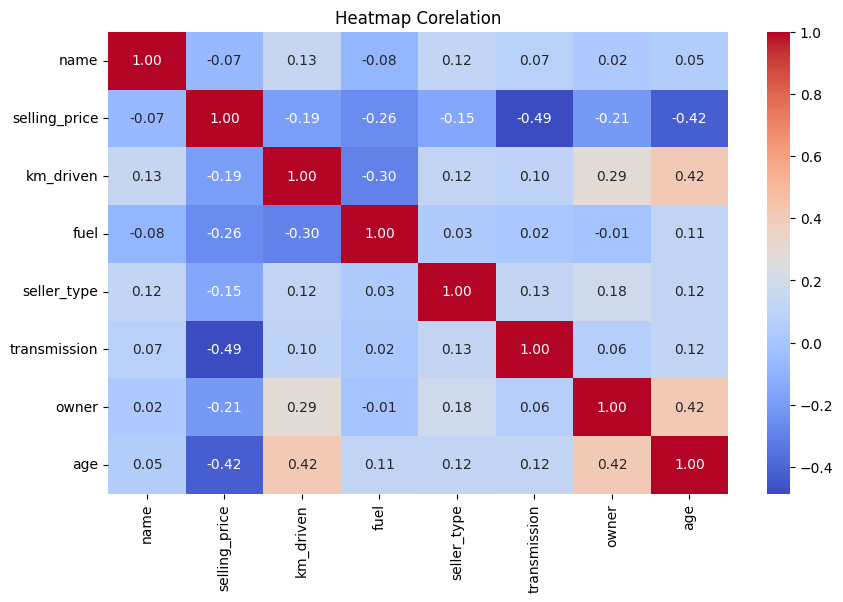

In [233]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',cmap="coolwarm")
plt.title('Heatmap Corelation')
plt.show()

In [234]:
selling_price_corr = df.corr()["selling_price"].sort_values(ascending=False)
selling_price_corr

,selling_price
selling_price,1.000000
name,-0.067094
seller_type,-0.153182
km_driven,-0.187359
owner,-0.213130
fuel,-0.261979
age,-0.424260
transmission,-0.486269


<Axes: >

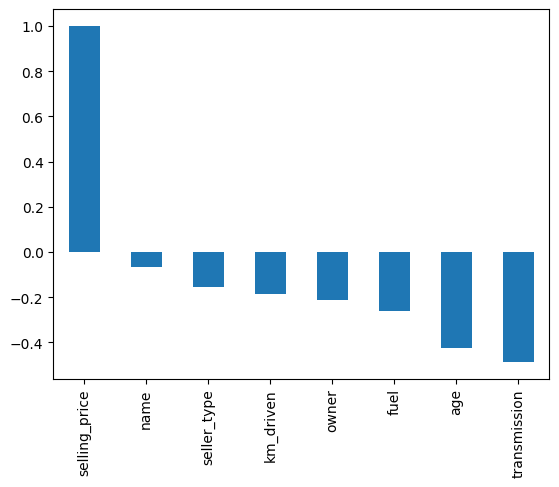

In [235]:
selling_price_corr.plot(kind="bar")

# Linear Regression

In [236]:
X = df.drop(['name','selling_price'],axis=1)
y = df['selling_price']
X,y

(      km_driven  fuel  seller_type  transmission  owner  age
 0         70000     4            1             1      0   13
 1         50000     4            1             1      0   13
 2        100000     1            1             1      0    8
 3         46000     4            1             1      0    3
 4        141000     1            1             1      2    6
 ...         ...   ...          ...           ...    ...  ...
 4335      80000     1            1             1      2    6
 4336      80000     1            1             1      2    6
 4337      83000     4            1             1      2   11
 4338      90000     1            1             1      0    4
 4339      40000     4            1             1      0    4
 
 [3577 rows x 6 columns],
 0        60000
 1       135000
 2       600000
 3       250000
 4       450000
          ...  
 4335    409999
 4336    409999
 4337    110000
 4338    865000
 4339    225000
 Name: selling_price, Length: 3577, dtype: int64)

In [237]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [238]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((2861, 6), (716, 6), (2861,), (716,))

0.38566846491225926 197896678171.88486


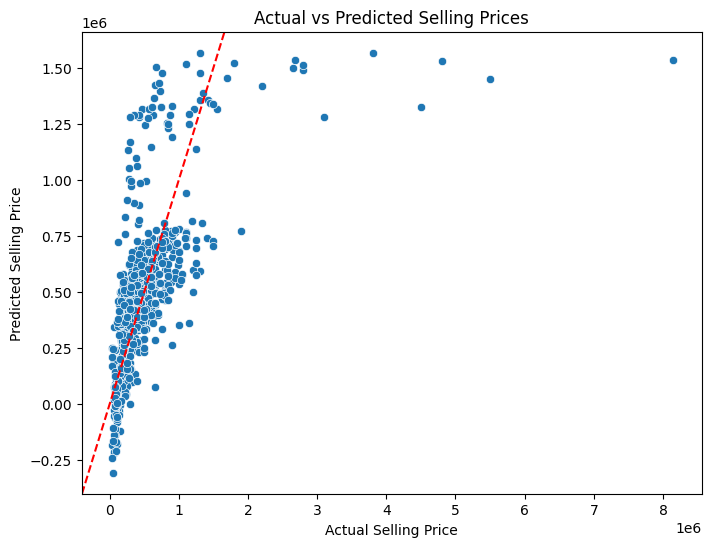

In [239]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred2 = model.predict(X_test)
print(r2_score(y_test,y_pred2),mean_squared_error(y_test,y_pred2))
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred2)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Prices")
plt.axline([0, 0], [1, 1], color="red", linestyle="--")
plt.show()

# Some Interesting Plots

In [1]:
import plotly.express as px

ModuleNotFoundError: No module named 'plotly'

In [241]:
Selling_price_owner_types = raw_df.groupby('owner')['selling_price'].mean()
px.bar(x = Selling_price_owner_types.index,
       y = Selling_price_owner_types.values,
       template = 'plotly_dark',
       color = Selling_price_owner_types.index,
       text_auto = True,
       width=800,height=500,
       title = 'Owner type affects selling Price',
       labels = {'y':'Total Selling Price','x':'Type of Owner'}
       )

In [242]:
Selling_price_transmission_types = raw_df.groupby('transmission')['selling_price'].mean()
px.bar(x = Selling_price_transmission_types.index,
       y = Selling_price_transmission_types.values,
       template = 'plotly_dark',
       color = Selling_price_transmission_types.index,
       text_auto = True,
       width=800,height=500,
       title = 'Owner type affects selling Price',
       labels = {'y':'Total Selling Price','x':'Type of Owner'}
       )

In [243]:
Selling_price_seller_types = raw_df.groupby('seller_type')['selling_price'].mean()
px.bar(x = Selling_price_seller_types.index,
       y = Selling_price_seller_types.values,
       template = 'plotly_dark',
       color = Selling_price_seller_types.index,
       text_auto = True,
       width=800,height=500,
       title = 'Owner type affects selling Price',
       labels = {'y':'Total Selling Price','x':'Type of Owner'}
       )

In [244]:
brand_name = raw_df["name"].tolist()
for i in range(len(brand_name)):
    brand_name[i] = brand_name[i].split(" ")[0]
raw_df["brand_name"] = brand_name
count_brand_name = raw_df["brand_name"].value_counts()
px.bar(count_brand_name,
       template = 'plotly_dark',
       color = count_brand_name,
       width=800,height=500,
       title = 'Brand sales',
       labels={'y':'Total sales','x':'Brand Name'})